In [5]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('stroke_data.csv')
# print(df.head())

In [7]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
print(df['sex'].unique())

[ 1.  0. nan]


In [9]:
df = df.dropna(subset=['sex'])

In [10]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.value_counts('stroke')

stroke
1    20460
0    20447
Name: count, dtype: int64

In [12]:
print("BEFORE REMOVING NEGATIVE AGE : \n", df['age'].count())
negativeAge = df[df['age']<0]

print("\n\nNEGATIVE AGE VALUEsS : ")
print(negativeAge['age'].count())

df = df[df['age']>=0]
print("\n\nAFTER REMOVING NEGATIVE AGE :\n",df['age'].count())

BEFORE REMOVING NEGATIVE AGE : 
 40907


NEGATIVE AGE VALUEsS : 
58


AFTER REMOVING NEGATIVE AGE :
 40849


In [13]:
x = df.drop("stroke", axis = 1)
y = df["stroke"]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [15]:
#Standardize the data, it'll help PCA to work better
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
selected_features = []
remainig_features = list(df.drop('stroke', axis =1).columns)

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
best_score =0
while remainig_features :
    best_feature = None
    for feature in remainig_features :
        temp_features = selected_features + [feature]
        X_train_temp = X_train[:, [df.columns.get_loc(f) for f in temp_features]]
        X_test_temp = X_test[:, [df.columns.get_loc(f) for f in temp_features]]
        
        # Train the Random Forest model

        rf_model.fit(X_train_temp, Y_train)
        Y_pred = rf_model.predict(X_test_temp)
        score = accuracy_score(Y_test, Y_pred)
        
        if score > best_score:
            best_score = score
            best_feature = feature
            
    if best_feature:
        selected_features.append(best_feature)
        remainig_features.remove(best_feature)
        print(f'ADDED FEATURE : {best_feature}, SCORE : {best_score: .4f}')
    else:
        break




ADDED FEATURE : hypertension, SCORE :  0.6061
ADDED FEATURE : heart_disease, SCORE :  0.6577
ADDED FEATURE : age, SCORE :  0.6716
ADDED FEATURE : ever_married, SCORE :  0.6739


In [19]:
print(f'Selected features: {selected_features}')

Selected features: ['hypertension', 'heart_disease', 'age', 'ever_married']


In [24]:
# Train the Random Forest model with the selected features
rf_model.fit(X_train[:, [df.columns.get_loc(f) for f in selected_features]], Y_train)

# Predict on test data
y_rf_pred = rf_model.predict(X_test[:, [df.columns.get_loc(f) for f in selected_features]])

# Print the classification report (precision, recall, F1-score)
print("Classification Report for Random Forest:")
print(classification_report(Y_test, y_rf_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      6121
           1       0.74      0.54      0.62      6134

    accuracy                           0.67     12255
   macro avg       0.69      0.67      0.67     12255
weighted avg       0.69      0.67      0.67     12255



In [25]:

# Calculate AUC-ROC score
y_rf_prob = rf_model.predict_proba(X_test[:, [df.columns.get_loc(f) for f in selected_features]])[:, 1]
auc_rf = roc_auc_score(Y_test, y_rf_prob)
print(f"AUC-ROC Score for Random Forest: {auc_rf:.4f}")


AUC-ROC Score for Random Forest: 0.7275


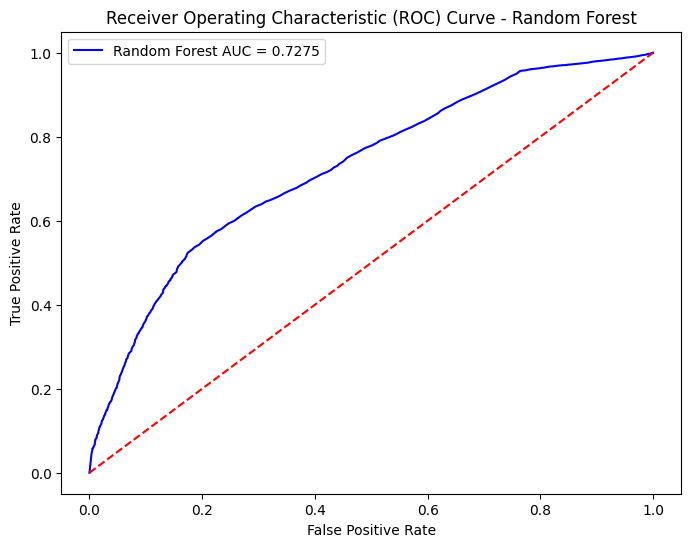

In [26]:

# Plot the ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest AUC = {auc_rf:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()


In [27]:

# Final accuracy of the model
final_accuracy = accuracy_score(Y_test, y_rf_pred)
print(f'Final accuracy with selected features: {final_accuracy:.4f}')

Final accuracy with selected features: 0.6739
